<a href="https://colab.research.google.com/github/FernandoGarciaMan/MetodosNumericos/blob/main/Integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget

import wget
import numpy as np

url = "https://raw.githubusercontent.com/gmauricio-toledo/MetodosNumericos/main/datos/datos_femur_altura.csv"
fname = url.split('/')[-1]
wget.download(url, fname)

datos = np.loadtxt(fname=fname,delimiter=' ')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=248b6039f605ec24beae96ec4f4c6c1e3a31b8a783b6d10d34b6e49763b483df
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
print(datos)


[[ 50.8 171.5]
 [ 45.4 165. ]
 [ 47.5 165. ]
 [ 47.  164. ]
 [ 52.  185. ]
 [ 51.4 182. ]
 [ 44.9 154. ]
 [ 48.4 170. ]
 [ 45.6 169. ]
 [ 47.3 170. ]
 [ 45.6 166. ]
 [ 41.6 148. ]
 [ 48.5 173. ]
 [ 49.  175. ]
 [ 47.8 170. ]
 [ 44.1 153. ]
 [ 50.8 174.5]
 [ 45.8 163. ]
 [ 44.3 159. ]
 [ 50.  173. ]
 [ 51.3 179. ]
 [ 46.1 167.5]
 [ 50.8 171.5]
 [ 48.5 170.5]
 [ 49.3 177. ]
 [ 47.  164. ]
 [ 54.4 184. ]
 [ 52.6 180. ]
 [ 47.  168. ]
 [ 47.  170. ]
 [ 44.5 163. ]
 [ 48.4 174. ]
 [ 45.1 161. ]
 [ 48.  159. ]
 [ 47.5 171. ]
 [ 48.  175. ]
 [ 46.2 166. ]
 [ 52.  177. ]
 [ 48.  171.5]
 [ 46.6 169. ]
 [ 51.3 172.5]
 [ 45.6 174. ]
 [ 50.8 179. ]
 [ 42.1 157.5]
 [ 41.7 152.5]
 [ 50.9 175. ]
 [ 49.6 173.5]
 [ 44.1 157.5]
 [ 43.4 156. ]
 [ 49.6 174. ]
 [ 48.3 170. ]
 [ 52.8 183. ]]


In [ ]:
xs= datos[:,0]
ys= datos[:,1]

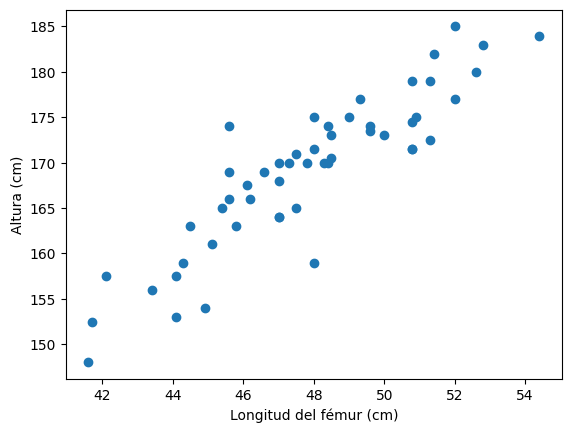

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(xs,ys)
plt.xlabel("Longitud del fémur (cm)")
plt.ylabel("Altura (cm)")
plt.show()

In [ ]:
def error_relativo(valor_real,aproximacion):
    return (valor_real-aproximacion)/valor_real

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
lr.fit(xs.reshape((-1,1)),ys)

LinearRegression()

In [ ]:
m = lr.coef_
b = lr.intercept_

In [ ]:
lr.score(xs.reshape((-1,1)),
         ys)

0.8024437811952196

In [ ]:
def f(x):
    result = m*x+b

    return result

In [ ]:
print("Altura: ",f(52))
print("Error: ",error_relativo(180,f(52)))

Altura:  [179.73775821]
Error:  [0.0014569]


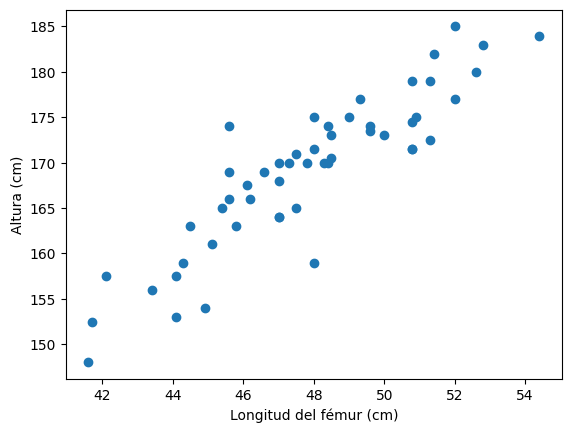

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(xs,ys)
plt.xlabel("Longitud del fémur (cm)")
plt.ylabel("Altura (cm)")
plt.show()

In [ ]:
from scipy.integrate import simpson

simpson(ys, xs)

433.5542239233431

In [ ]:
xmin = np.min(xs)
xmax = np.max(xs)

In [ ]:
from scipy.integrate import quad

quad(func=f,
     a=xmin,
     b=xmax)


(2170.3823613190198, 2.4096084697766914e-11)

In [ ]:

def trapecio_sencilla(f,a,b,valor_real):
    resultado = (b-a)*(f(a)+f(b))/(2)
    error = error_relativo(valor_real,resultado)
    return resultado, error



In [ ]:
trapecio_sencilla(f,xmin,xmax,32.90525553101446)

(array([2170.38236132]), array([-64.95853235]))